In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [51]:
df=pd.read_csv('mushroom.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


8124 rows x 23 columns with no any null values.

All 22 features and 1 column for specifying class.

In [52]:
df.shape

(8124, 23)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [54]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

we have only object types of values which are independent variable and the class is our target variable in this dataset.

In [55]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [56]:
df.isna()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8120,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


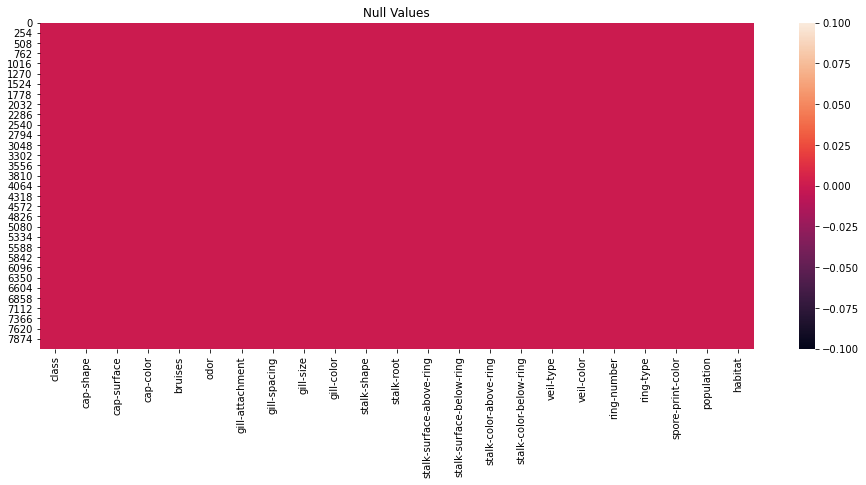

In [57]:
plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

Their are no null values in this dataset.

In [58]:
df["class"].unique()

array(['p', 'e'], dtype=object)

There are two unique values in df["class"]

In [59]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [60]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [61]:
mappings=list()

encoder=LabelEncoder()
for column in range(len(df.columns)):
    df[df.columns[column]]=encoder.fit_transform(df[df.columns[column]])
    mappings_dict={index: label for index,label in enumerate(encoder.classes_)}
    mappings.append(mappings_dict)

In [62]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [63]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [64]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [65]:
df.isna()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8120,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# EDA

univariate analysis

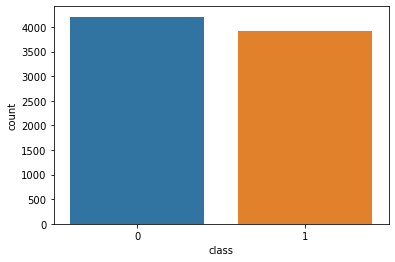

In [66]:
sns.countplot(df["class"]);

There is class imbalance issue exists.

# Bivariate analysis

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


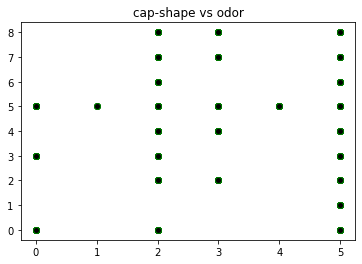

In [67]:
plt.scatter(df["cap-shape"],df["odor"],alpha=0.8,c=(0,0,0),edgecolors='g')
plt.title("cap-shape vs odor")
plt.show()

In this dataset ploting the relationships between cap-shape and odor.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


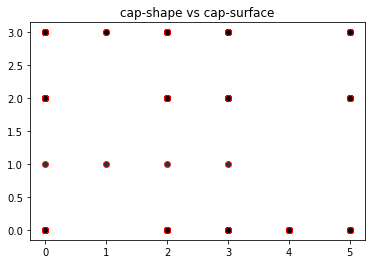

In [68]:
plt.scatter(df["cap-shape"],df["cap-surface"],alpha=0.8,c=(0,0,0),edgecolors='r')
plt.title("cap-shape vs cap-surface")
plt.show()

In this dataset ploting the relationships between cap-shape and cap-surface.

# checking correlation

In [69]:
cor=df.corr()

In [70]:
cor

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [74]:
df=df.drop(["veil-type"],axis=1)

In [75]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


# Multivariate analysis

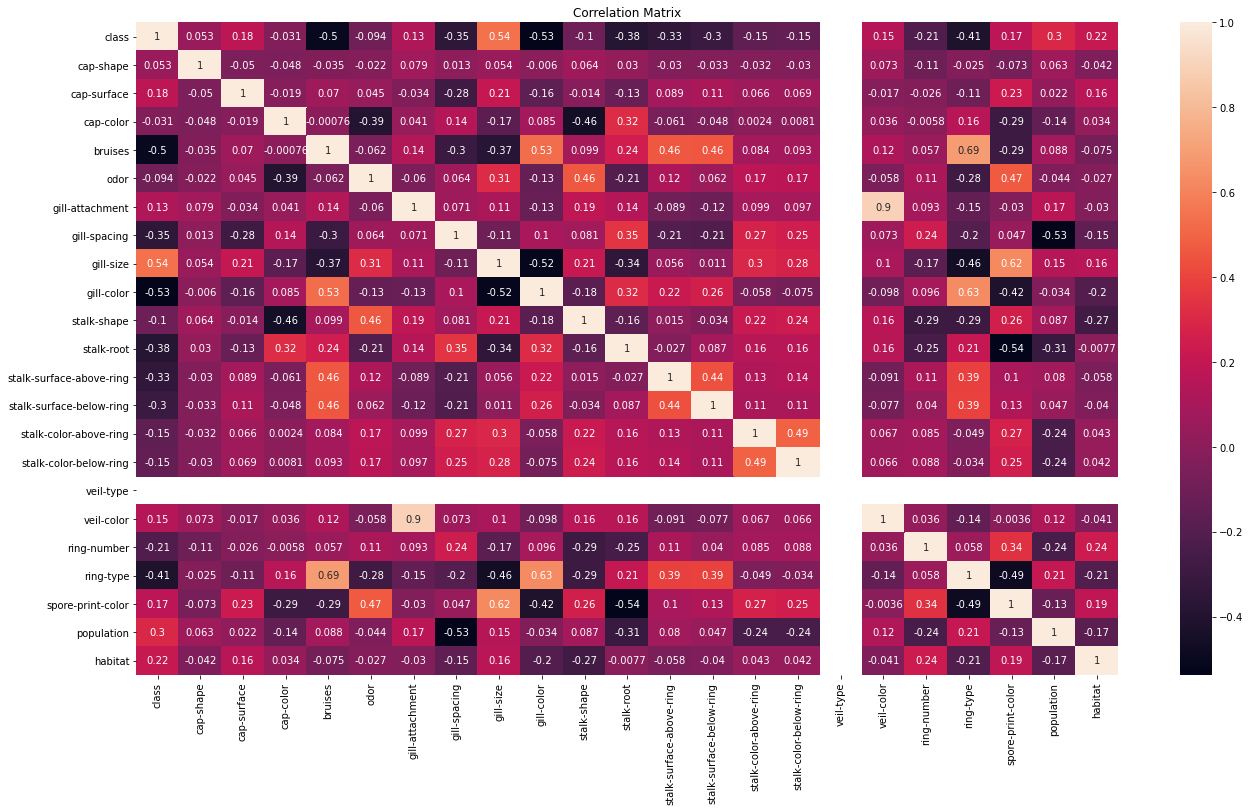

In [71]:
plt.figure(figsize=[22,12])
sns.heatmap(cor,annot=True)
plt.title("Correlation Matrix")
plt.show()

This plot shows the correlation between the variables on the axis.correlation ranges from -1 to +1

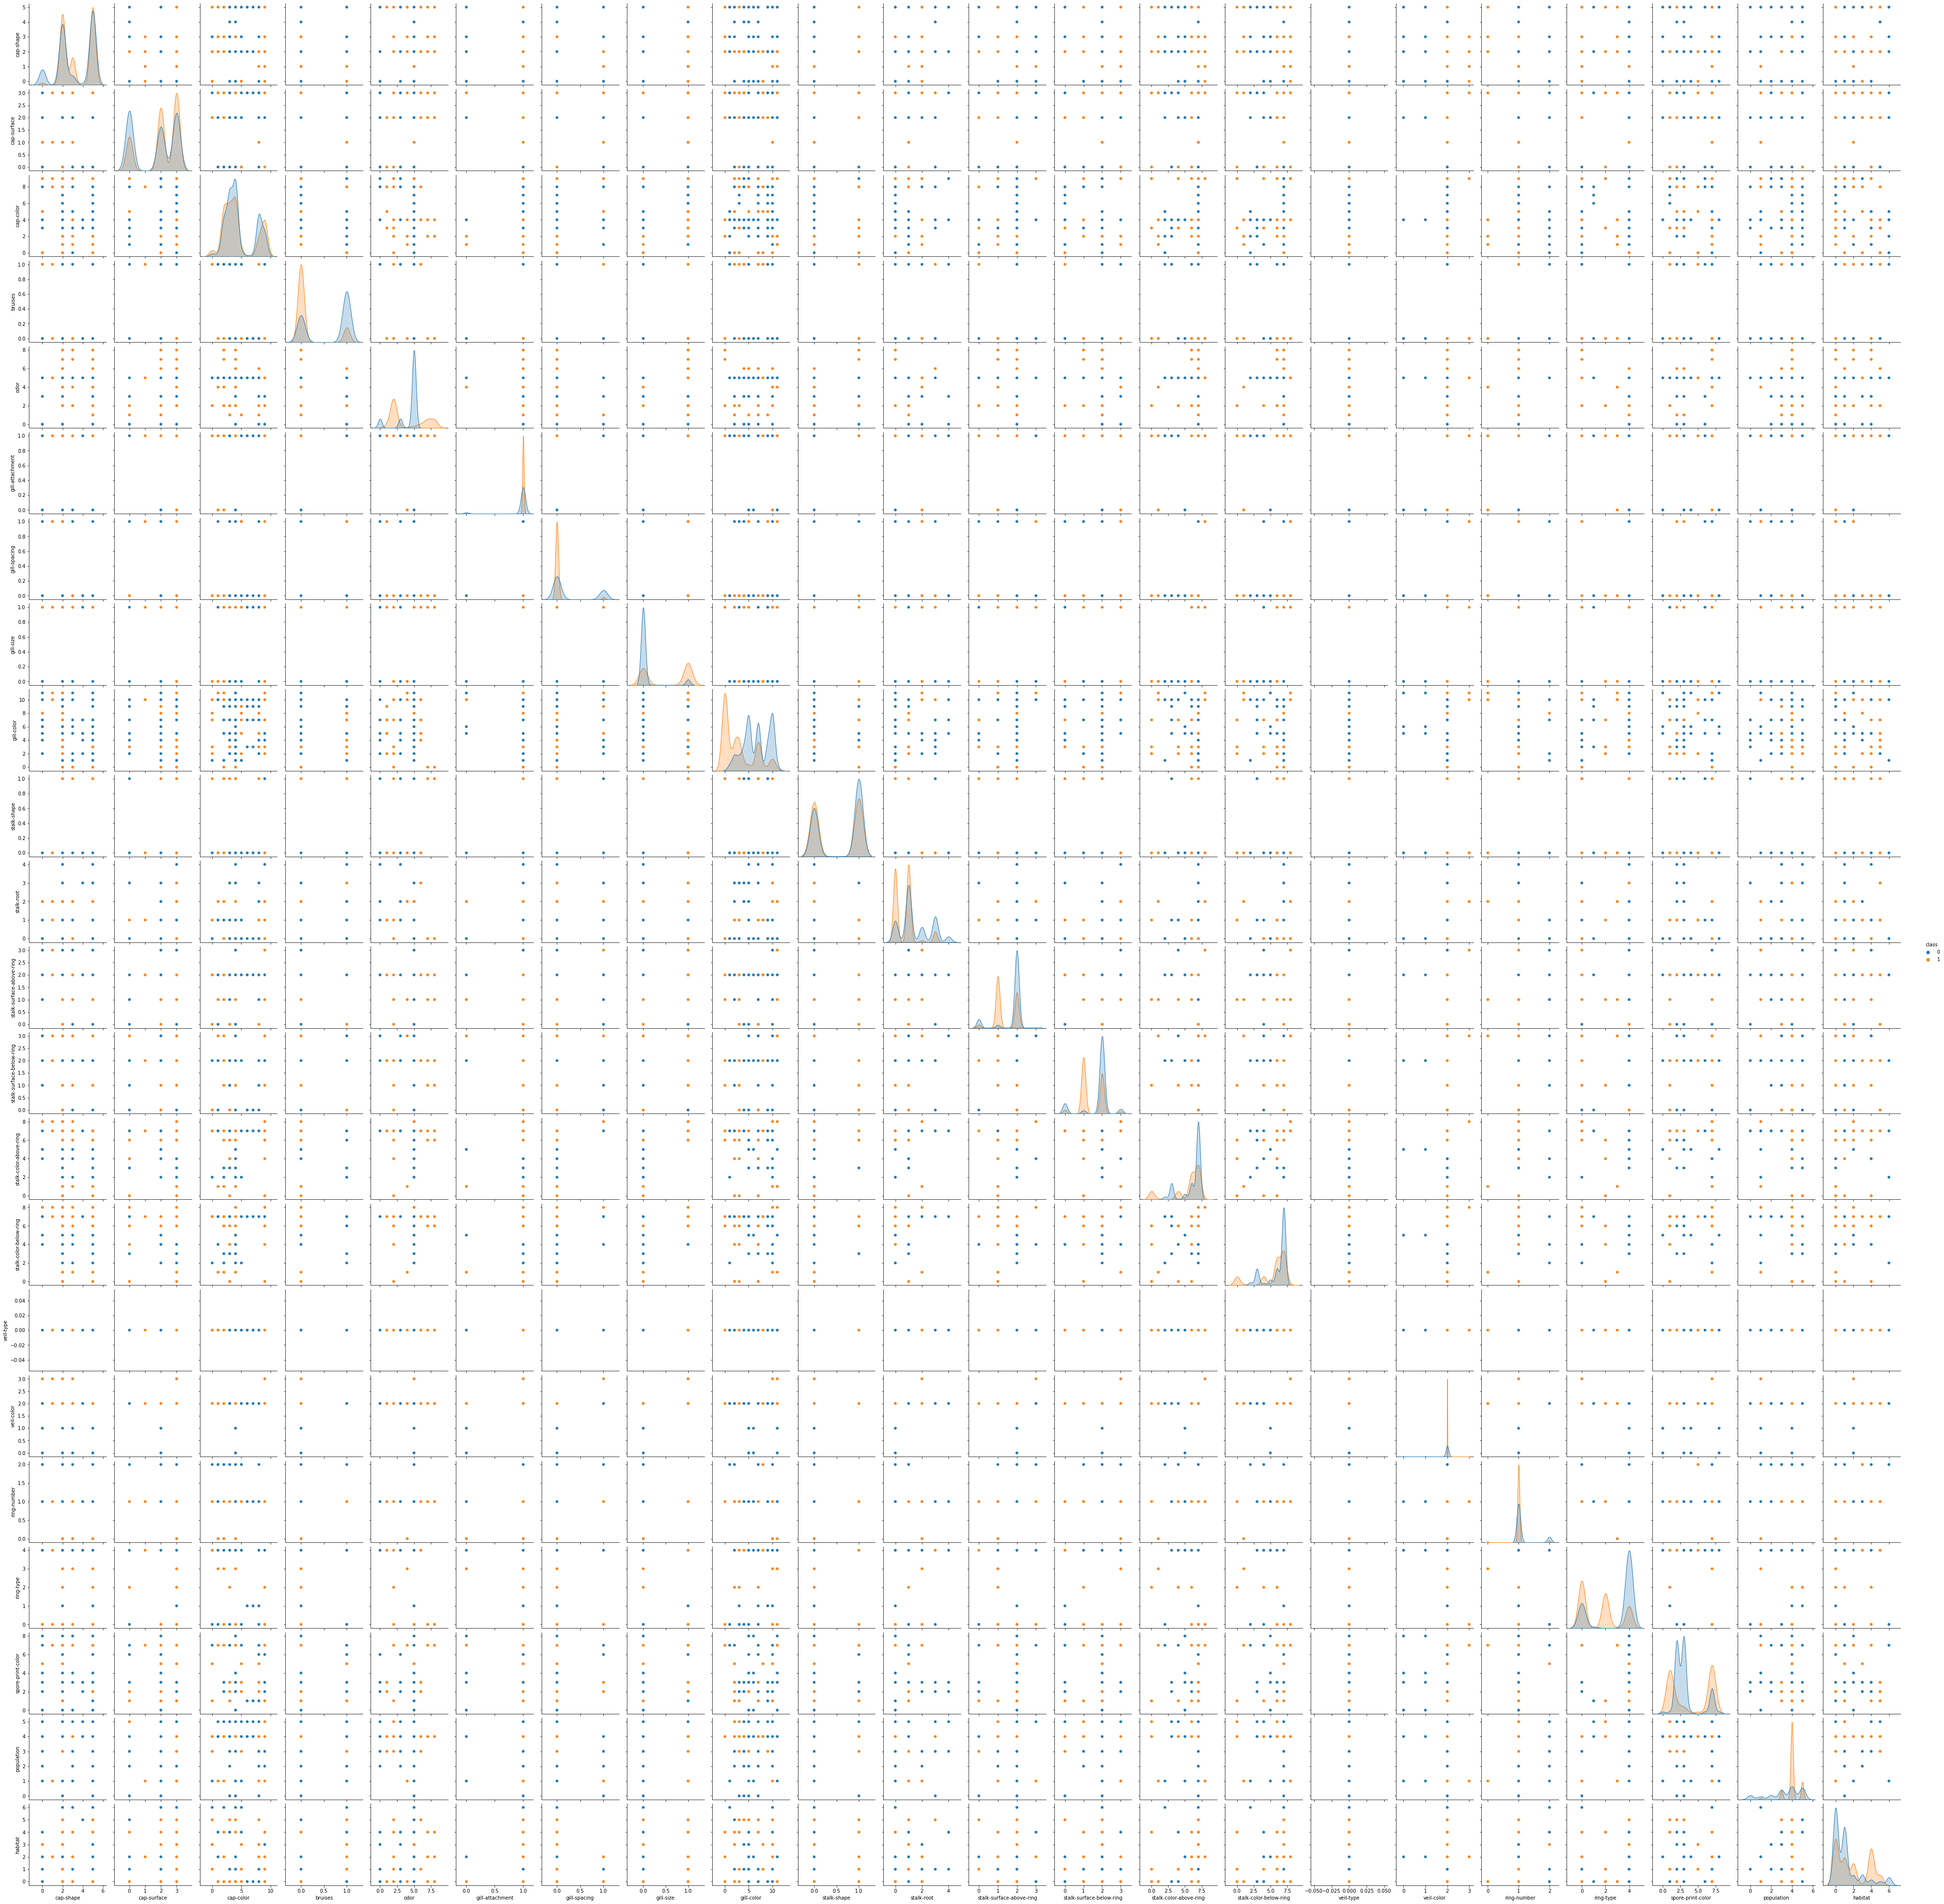

In [72]:
sns.pairplot(df,hue="class")

In [73]:
corr_matrix=df.corr()
corr_matrix["class"].sort_values(ascending=False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

Their are identify the corrlation of independent variable with target variable "class".

# outlier removal

In [76]:
from scipy.stats import zscore
z=np.abs(zscore(df))

new_df=df[(z<5).all(axis=1)]

In [77]:
new_df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8113,1,3,3,2,0,8,1,0,1,0,...,1,1,6,6,2,1,0,7,4,0
8116,1,3,3,4,0,7,1,0,1,0,...,2,1,6,7,2,1,0,7,4,2
8117,1,3,2,2,0,8,1,0,1,0,...,1,2,6,7,2,1,0,7,4,0
8118,1,3,3,4,0,2,1,0,1,0,...,1,2,6,7,2,1,0,7,4,0


In [78]:
new_df.shape

(7914, 22)

In [79]:
df.shape

(8124, 22)

In [80]:
(210/8124)*100

2.58493353028065

# skewness

In [90]:
x=df.drop("class",axis=1)
y=df["class"]

In [91]:
x.skew()

cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

In [92]:
from sklearn.preprocessing import power_transform
new_df=power_transform(x)

new_df=pd.DataFrame(new_df,columns=x.columns)

In [94]:
new_df.skew()

cap-shape                  -0.205860
cap-surface                -0.473764
cap-color                   0.004059
bruises                     0.342750
odor                       -0.144660
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                 -0.246738
stalk-shape                -0.271345
stalk-root                  0.023182
stalk-surface-above-ring   -0.438332
stalk-surface-below-ring   -0.114150
stalk-color-above-ring     -0.964471
stalk-color-below-ring     -0.925320
veil-color                  5.797741
ring-number                -0.499098
ring-type                  -0.339232
spore-print-color           0.018174
population                 -0.368219
habitat                     0.123132
dtype: float64

skewness has been removed.

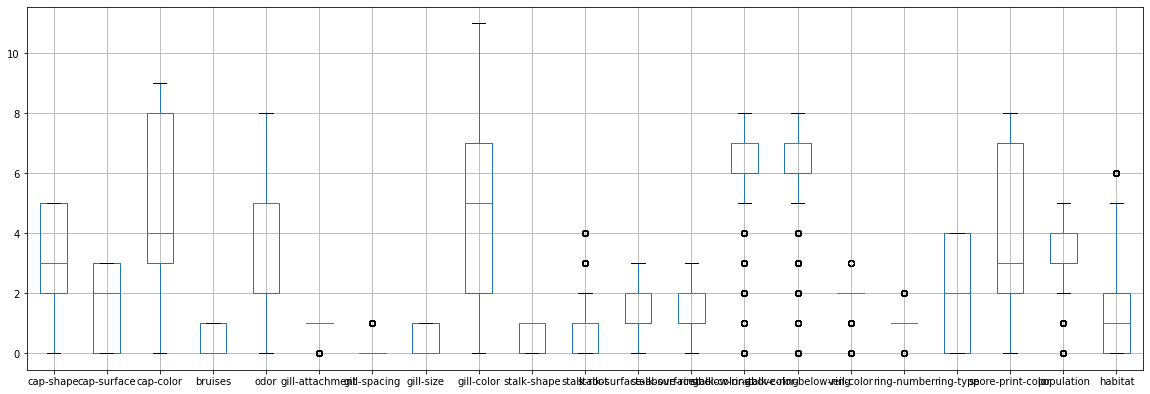

In [100]:
x.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

# Handling class imbalance problem by oversampling the minority class

In [101]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)

In [102]:
y_over.value_counts()

1    4208
0    4208
Name: class, dtype: int64

# Finding best random_state

In [103]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [108]:
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm=DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100, "at random_state", i)

100.0 at random_state 0
100.0 at random_state 1
100.0 at random_state 2
100.0 at random_state 3
100.0 at random_state 4
100.0 at random_state 5
100.0 at random_state 6
100.0 at random_state 7
100.0 at random_state 8
100.0 at random_state 9
100.0 at random_state 10
100.0 at random_state 11
100.0 at random_state 12
100.0 at random_state 13
100.0 at random_state 14
100.0 at random_state 15
100.0 at random_state 16
100.0 at random_state 17
100.0 at random_state 18
100.0 at random_state 19
100.0 at random_state 20
100.0 at random_state 21
100.0 at random_state 22
100.0 at random_state 23
100.0 at random_state 24
100.0 at random_state 25
100.0 at random_state 26
100.0 at random_state 27
100.0 at random_state 28
100.0 at random_state 29
100.0 at random_state 30
100.0 at random_state 31
100.0 at random_state 32
100.0 at random_state 33
100.0 at random_state 34
100.0 at random_state 35
100.0 at random_state 36
100.0 at random_state 37
100.0 at random_state 38
100.0 at random_state 39
100.0 at r

In [109]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu,"on Random_state ",maxRS)

Best accuracy is  1.0 on Random_state  1


In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=1)

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [112]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [113]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [114]:
from sklearn.svm import SVC

In [115]:
SV=SVC()
SV.fit(x_train,y_train)
pred=SV.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1236
           1       1.00      0.98      0.99      1202

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



In [116]:
from sklearn.model_selection import cross_val_score

In [117]:
print(cross_val_score(DTC,x,y,cv=5).mean())

0.9335075407351269


In [118]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.894354376657825


In [120]:
print(cross_val_score(SV,x,y,cv=5).mean())

0.8420306934444864


# HYPER PARAMETER TUNING

In [128]:
from sklearn.model_selection import GridSearchCV

In [134]:
parameter = {'max_depth' : np.arange(2,10),
              'criterion':['gini','entropy']}

In [135]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [136]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [137]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [143]:
Final_mod=DecisionTreeClassifier(criterion='gini', max_depth=7)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)

# saving the model

In [144]:
import joblib
joblib.dump(Final_mod, "FinalModel.pkl")

['FinalModel.pkl']